# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

"How do average salaires compare across different industries?"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

__author__ = "Anthony Wong"
__email__ = "anthonywong2718@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_salary_df = pd.read_csv('data/train_salaries.csv')
train_features_df = pd.read_csv('data/train_features.csv')
test_features_df = pd.read_csv('data/test_features.csv')

### ---- 3 Clean the data ----

#### ---- Examine the Data ----

In [3]:
train_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [4]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [5]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


#### ---- Check for Duplicate Data ---- 

In [6]:
# look for duplicate data, invalid data (e.g. salaries <= 0), or corrupt data and remove it
train_salary_df = train_salary_df.drop_duplicates()

In [7]:
train_features_df = train_features_df.drop_duplicates()

In [8]:
test_features_df = test_features_df.drop_duplicates()

#### ---- Remove Invalid Data ----

In [9]:
invalid_jobId = train_salary_df[train_salary_df['salary'] <= 0].jobId.values

In [10]:
train_salary_df = train_salary_df.loc[~train_salary_df['jobId'].isin(invalid_jobId)]

In [11]:
train_features_df = train_features_df.loc[~train_features_df['jobId'].isin(invalid_jobId)]

#### ---- Identify Numerical and Categorical Columns ----

In [12]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 68.7+ MB


In [13]:
num_cols = ['yearsExperience', 'milesFromMetropolis']
cat_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

#### ---- Summarize Numerical and Categorical Variables Separately ----

In [14]:
train_features_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000
mean,11.992407,49.529381
std,7.212390,28.877721
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [15]:
train_features_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684809020,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


#### ---- visualize target variable (salary) ----

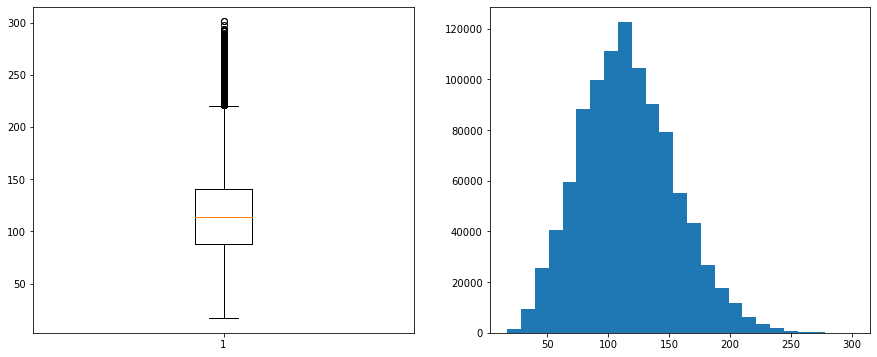

In [16]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.boxplot(train_salary_df.salary)
plt.subplot(1,2,2)
plt.hist(train_salary_df.salary, bins = 25)
plt.show()

#### ---- Visualize Each Feature Variables ----

In [66]:
jobType = train_features_df['jobType']
job = {jobtype:0 for jobtype in jobType.unique()} ### numbers of jobType
for jobtype in jobType:
    job[jobtype] += 1

degreeType = train_features_df['degree']
degree = {deg:0 for deg in degreeType.unique()} ### numbers of degree
for deg in degreeType:
    degree[deg] += 1

majorType = train_features_df['major']
major = {maj:0 for maj in majorType.unique()} ### numbers of major
for maj in majorType:
    major[maj] += 1

industryType = train_features_df['industry']
industry = {ind:0 for ind in industryType.unique()} ### numbers of industry
for ind in industryType:
    industry[ind] += 1

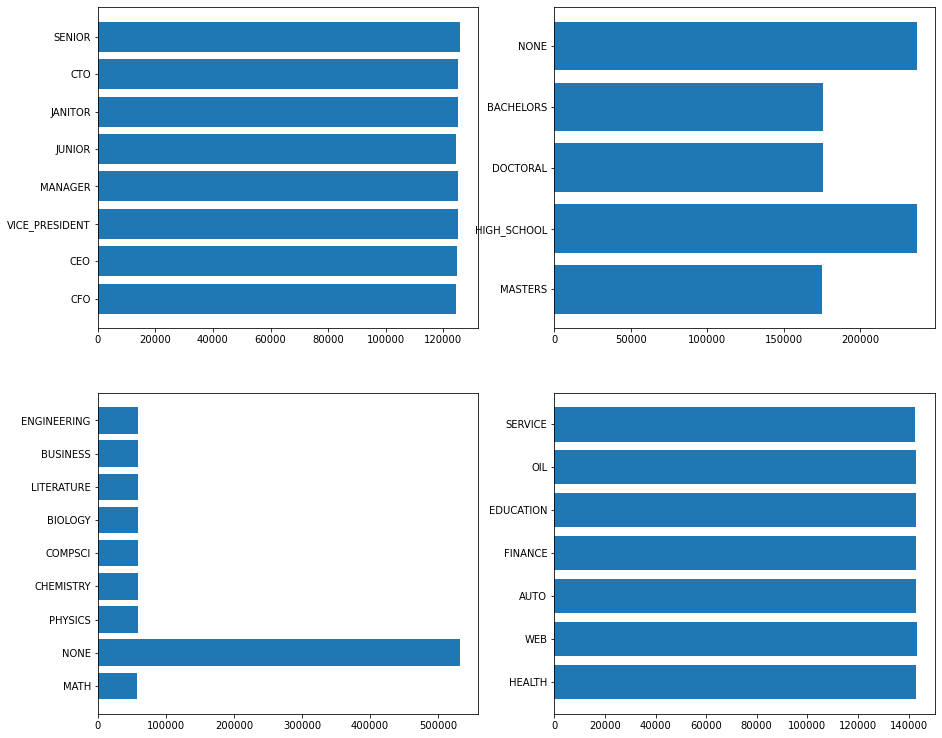

In [74]:
plt.figure(figsize = (15,13))

def bar_plot(feat_type, feature):
    barplot = plt.barh(feat_type.unique(), width = [feature[t] for t in feature])
    
### distribution of jobType
plt.subplot(2,2,1)
bar_plot(jobType, job)
### distribution of degree
plt.subplot(2,2,2)
bar_plot(degreeType, degree)
### distribution of major
plt.subplot(2,2,3)
bar_plot(majorType, major)
### distribution of industry
plt.subplot(2,2,4)
bar_plot(industryType, industry)

### ---- 4 Explore the data (EDA) ----

In [18]:
#summarize each feature variable


In [19]:
#summarize the target variable

In [20]:
#look for correlation between each feature and the target

In [21]:
#look for correlation between features

### ---- 5 Establish a baseline ----

In [22]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [23]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [24]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [25]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [26]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [27]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [28]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [29]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data